## Python Demo
### A prelude to xxx Python Training

We're going to follow a normal analyst workflow:
1. Pull data from Exadata.
2. View the data.
3. Split the data into training and test.
4. Clean the data and remove outliers.
5. Train a model.
6. Test the model.
7. Export the model.

This demo is intended to be something of a [whirlwind](http://www.oreilly.com/programming/free/files/a-whirlwind-tour-of-python.pdf), so don't worry if you aren't able to keep up. This should just give you a taste of the look and feel of Python, along with its power.

We're going to model a store's sales of in June 2017, based on its sales in April and June 2017.

### 1. Pull Data

In [1]:
# Import the Oracle connection module from the py_effo library.
import py_effo.oracle_connection as oracle_connection
# Instantiate a connection object.
con = oracle_connection.OracleConnection('an_cm_ws29')
# Construct a query for what data we want to pull back.
query = '''SELECT store_id,
                  -- April Spend
                  SUM(CASE WHEN transaction_dttm BETWEEN TO_DATE('20170401', 'YYYYMMDD')
                                                     AND TO_DATE('20170430', 'YYYYMMDD')
                      THEN basket_net_spend_amt
                      ELSE 0
                  END) AS apr_spend,
                  -- May Spend
                  SUM(CASE WHEN transaction_dttm BETWEEN TO_DATE('20170501', 'YYYYMMDD')
                                                     AND TO_DATE('20170531', 'YYYYMMDD')
                      THEN basket_net_spend_amt
                      ELSE 0
                  END) AS may_spend,
                  -- June Spend
                  SUM(CASE WHEN transaction_dttm BETWEEN TO_DATE('20170601', 'YYYYMMDD')
                                                     AND TO_DATE('20170630', 'YYYYMMDD')
                      THEN basket_net_spend_amt
                      ELSE 0
                  END) AS june_spend
            FROM transaction_basket_fct
            WHERE transaction_dttm BETWEEN TO_DATE('20170401', 'YYYYMMDD') AND TO_DATE('20170630', 'YYYYMMDD')
            -- Use this modulus to take a sample (just to make this simpler)
            AND MOD(store_id, 23) = 0
            GROUP BY store_id'''
# Execute the query.
store_spend = con.query(query)
# View a sample of the data
store_spend.head()

,STORE_ID,APR_SPEND,MAY_SPEND,JUNE_SPEND
0,12075,4191157.76,4383597.28,4048826.81
1,575,2276054.42,2505438.31,2341338.89
2,2231,3533205.35,3666165.52,3403492.53
3,21413,2963421.46,3063319.83,2986293.81
4,8441,1517188.03,1572763.01,1573881.54


### 2. View the data
If you want to take a look at the whole thing as a table, run the following cell.

In [2]:
store_spend

,STORE_ID,APR_SPEND,MAY_SPEND,JUNE_SPEND
0,12075,4191157.76,4383597.28,4048826.81
1,575,2276054.42,2505438.31,2341338.89
2,2231,3533205.35,3666165.52,3403492.53
3,21413,2963421.46,3063319.83,2986293.81
4,8441,1517188.03,1572763.01,1573881.54
5,23069,4406536.24,4618665.20,4327569.04
6,25001,2929709.49,3005068.35,2906927.07
7,14053,3053253.55,3283637.10,3231933.98
8,9959,3252172.45,3421367.51,3025686.51
9,29279,9124484.55,9744165.95,9206953.36


Let's make density plots of store spend in each month.

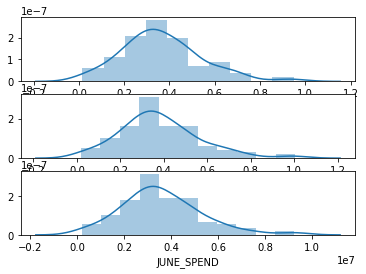

In [3]:
# Set up for plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Create 3 vertical plots that share an x axis
fig, ax = plt.subplots(nrows=3, sharex='row')
for i, col_name in enumerate(['APR_SPEND', 'MAY_SPEND', 'JUNE_SPEND']):
    sns.distplot(store_spend[col_name], ax=ax[i])

Yes, we could spend time to make this prettier, but that's not what we're after.

### 3. Split into training and test
First, separate the response and the features into their own NumPy arrays.

In [4]:
from sklearn.model_selection import train_test_split
# Separate response from features
X = store_spend[['APR_SPEND', 'MAY_SPEND']]
y = store_spend['JUNE_SPEND']
# Split into training ang test
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 4. Clean and Remove outliers
We'll use a method called Isolation Forest to find outliers.

In [5]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(max_samples=100, random_state=8451)
iso_fit = isolation_forest.fit(X_train)
# Get outlier ratings for all of the points in the training data
outlier_ratings = iso_fit.decision_function(X_train)
# Take a look at the first 50 outlier ratings
outlier_ratings[:50]

/opt/anaconda/2.7/lib/python2.7/site-packages/sklearn/ensemble/iforest.py:184: UserWarning: max_samples (100) is greater than the total number of samples (81). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))


array([-0.0429329 ,  0.08679814,  0.08933855,  0.10421153,  0.08954619,
        0.07757447, -0.1766574 ,  0.08024791,  0.09192089,  0.03607262,
        0.09067309,  0.08547637,  0.10261635, -0.05385559,  0.02320795,
        0.11012731, -0.09829139,  0.03843075,  0.03350832,  0.02115298,
        0.093994  ,  0.0301351 ,  0.04115635,  0.02516915,  0.07043483,
       -0.20061712,  0.07632863,  0.073279  ,  0.07503085,  0.01501386,
        0.04013471,  0.00030202,  0.08473557,  0.0802262 ,  0.1026052 ,
        0.06785023,  0.10015544,  0.03854869,  0.09088828,  0.10306483,
        0.03886332,  0.07009797,  0.06606909,  0.08066967,  0.10924185,
        0.03239173,  0.06881967,  0.07170266,  0.11103932,  0.08192542])

Plot the outlier ratings to see if there is an obvious cutoff (lower scores mean more likely to be an outlier).

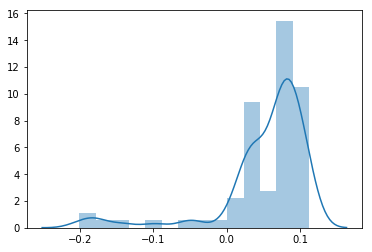

In [6]:
sns.distplot(outlier_ratings)

Let's cut off at -0.10; it looks like there's a gap there. Remove rows that meet this outlier condition.

In [7]:
outlier_filter = (outlier_ratings <= -.1)
X_train = X_train[~outlier_filter]
y_train = y_train[~outlier_filter]
print('X_train shape: %s' % str(X_train.shape))
print('y_train shape: %s' % str(y_train.shape))

X_train shape: (77, 2)
y_train shape: (77,)


### Train a model.
For the sake of simplicity, let's just do a linear regression.

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model = lin_reg.fit(X=X_train, y=y_train)
print('Coef: %s' % str(model.coef_))
print('Intercept: %s' % str(model.intercept_))

Coef: [-0.21056238  1.11991531]
Intercept: 105095.701818


That was easy. What's the training MSE?

In [9]:
from sklearn.metrics import mean_squared_error
y_pred_train = model.predict(X_train)
mean_squared_error(y_train, y_pred_train)

17717121120.230175

### Test the model.
First, make predictions.

In [10]:
y_pred_test = model.predict(X_test)

Now see how good they are.

In [11]:
mean_squared_error(y_test, y_pred_test)

9858597161.5873394

### Export the model.
Let's just "pickle" the model and save it. Pickling saves Python objects in files, so you can reload them in a later session.

In [12]:
import pickle
pickle.dump(model, file=open('my_model.pickle', 'w'))